# Milestone 3 - Regression Simulation 

## Author - Mike Pearson



## Instructions

Using the California dairy production dataset, perform time series analysis on the data for one of Cottage Cheese Production, Milk Production, or Ice Cream Production (your choice) to answer the following questions:

1. Is this time series stationary?
2. Is there a significant seasonal component?
3. For the residual from the STL decomposition of the time series, what is the order of the ARMA(p,q) process that best fits?

Then forecast production for 12 months and report both numeric values and plot the confidence intervals.

1. Are the confidence intervals reasonably small compared to the forecast means?
2. How do the confidence intervals behave as time moves to the future?


### Note
Please clearly outline the results with markdown text. Be sure your discussion includes narrative for your figures and tables so it is clear to the reader the importance of each bit of evidence.

In [2]:
fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/CADairyProduction.csv"

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [4]:
Dairy = pd.read_csv(fileName)
print(Dairy.head())
print(Dairy.dtypes)
print(Dairy.tail())

   Year Month  Cotagecheese.Prod  Icecream.Prod  Milk.Prod  N.CA.Fat.Price  \
0  1995   Jan              4.370         51.595      2.112          0.9803   
1  1995   Feb              3.695         56.086      1.932          0.8924   
2  1995   Mar              4.538         68.453      2.162          0.8924   
3  1995   Apr              4.280         65.722      2.130          0.8967   
4  1995   May              4.470         73.730      2.227          0.8967   

   Month.Count  monthNumSqred  monthNumCubed  
0            1              1              1  
1            2              4              8  
2            3              9             27  
3            4             16             64  
4            5             25            125  
Year                   int64
Month                 object
Cotagecheese.Prod    float64
Icecream.Prod        float64
Milk.Prod            float64
N.CA.Fat.Price       float64
Month.Count            int64
monthNumSqred          int64
monthNumCubed    

In [47]:
Dairy.index = pd.date_range(start = '1-1-1995', end = '12-31-2013', freq = 'M')
##print(Dairy.head())
Cottage_cheese = np.log(Dairy.loc[:,"Cotagecheese.Prod"])
print(Cottage_cheese.head())
print(Cottage_cheese.tail())

1995-01-31    1.474763
1995-02-28    1.306981
1995-03-31    1.512486
1995-04-30    1.453953
1995-05-31    1.497388
Freq: M, Name: Cotagecheese.Prod, dtype: float64
2013-08-31    0.774266
2013-09-30    0.785270
2013-10-31    0.825928
2013-11-30    0.623261
2013-12-31    0.852285
Freq: M, Name: Cotagecheese.Prod, dtype: float64


Text(0.5, 0, 'Date')

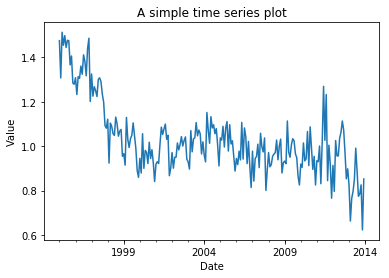

In [48]:
Cottage_cheese.plot()
plt.title('A simple time series plot')
plt.ylabel('Value')
plt.xlabel('Date')

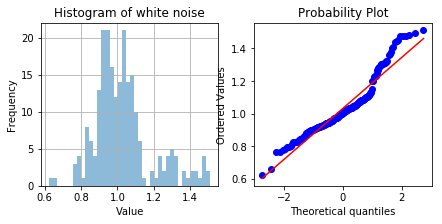

In [49]:
def dist_ts(ts, lab = '', bins = 40):
    import scipy.stats as ss
    ## Setup a figure with two subplots side by side
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
    ## Plot the histogram with labels
    ts.hist(ax = ax1, bins = bins, alpha = 0.5)
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of ' + lab)
    ## Plot the q-q plot on the other axes
    ss.probplot(ts, plot = ax2)
    
dist_ts(Cottage_cheese, 'white noise') 


## Q-Q plot 

Does not look a lot like a normal distribution


## Let's look at the AutoCorrelation and Partial Autocorrelation plots

This will tell us if the time series is stationary

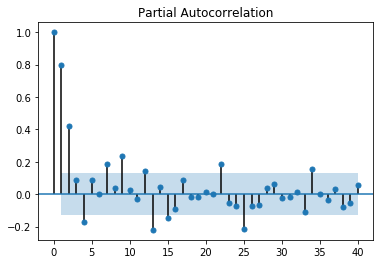

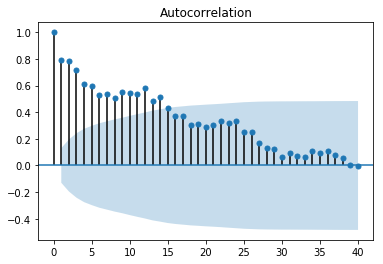

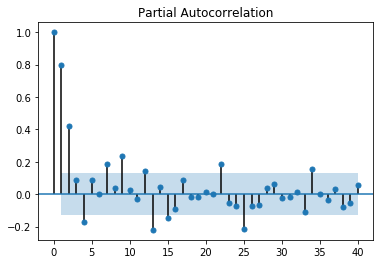

In [50]:
import statsmodels.graphics.tsaplots as splt
splt.plot_acf(Cottage_cheese, lags = 40)
splt.plot_pacf(Cottage_cheese, lags = 40)

## The Cottage Cheese production

Is not stationary since the Autocorrelation dies out slowly and the partial autocorrelation does is significant for more than the first term.

## Seasonal

It also appears that there is a seasonal component in the partial autocorrelatoin

               resid     trend  seasonal
1995-01-31       NaN       NaN -0.031217
1995-02-28       NaN       NaN -0.092606
1995-03-31       NaN       NaN  0.025221
1995-04-30       NaN       NaN -0.021971
1995-05-31       NaN       NaN  0.021397
1995-06-30       NaN       NaN  0.053774
1995-07-31  0.014796  1.407516  0.054051
1995-08-31 -0.004390  1.397446  0.081249
1995-09-30 -0.033280  1.386018  0.012588
1995-10-31 -0.000345  1.371499  0.034452
1995-11-30 -0.032206  1.359581 -0.043389
1995-12-31  0.023147  1.348834 -0.093550


,resid,trend,seasonal
2013-01-31,-0.041709,0.897978,-0.031217
2013-02-28,-0.120833,0.876642,-0.092606
2013-03-31,-0.110288,0.850534,0.025221
2013-04-30,-0.014370,0.832496,-0.021971
2013-05-31,0.012315,0.816867,0.021397
2013-06-30,0.131875,0.805378,0.053774
2013-07-31,NaN,NaN,0.054051
2013-08-31,NaN,NaN,0.081249
2013-09-30,NaN,NaN,0.012588
2013-10-31,NaN,NaN,0.034452


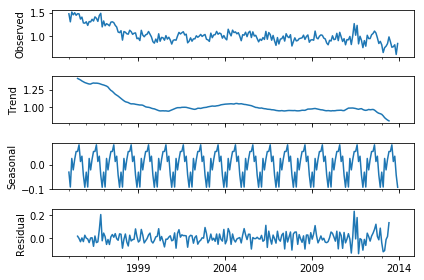

In [51]:
import statsmodels.tsa.seasonal as sts
def decomp_ts(ts, freq = 'M', model = 'additive'):
    res = sts.seasonal_decompose(ts, model = model) #, freq = freq)
    #resplot = res.plot()
    res.plot()
    return(pd.DataFrame({'resid': res.resid, 
                         'trend': res.trend, 
                         'seasonal': res.seasonal},
                       index = ts.index) )

decomp = decomp_ts(Cottage_cheese)
print(decomp[:12])
decomp[-12:]


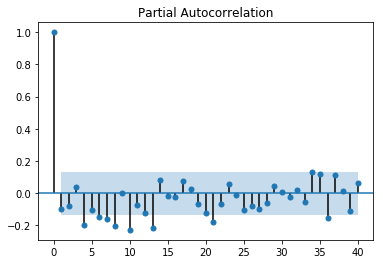

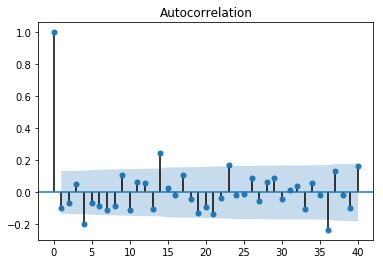

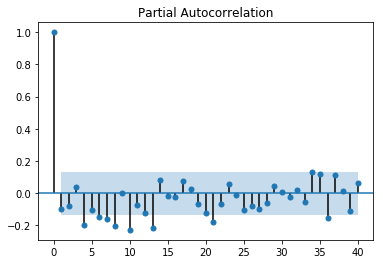

In [52]:

splt.plot_acf(decomp['1995-07-31':'2013-06-30'].resid, lags = 40)
splt.plot_pacf(decomp['1995-07-31':'2013-06-30'].resid, lags = 40)

## The seasonal and trend components are partially removed


In [53]:
from statsmodels.tsa.stattools import adfuller
def DF_Test(ts):
    stationary = adfuller(ts)
    ## Print the results
    print('D-F statistic = ' + str(stationary[0]))
    print('p-value = ' + str(stationary[1]))
    print('number of lags used = ' + str(stationary[2]))
    print('Critical value at 5% confidence = ' + str(stationary[4]['5%']))
    print('Critical value at 10% confidence = ' + str(stationary[4]['10%']))
DF_Test(decomp.resid[6:-6])


D-F statistic = -8.004769212082168
p-value = 2.283280047895637e-12
number of lags used = 12
Critical value at 5% confidence = -2.875885461947131
Critical value at 10% confidence = -2.5744164898444515


## Dickey-Fuller

Because the p-value is so small, we can reject the null hypothesis that the residuals are not stationary.

So, we can say that the residuals of the Cottage Cheese production are stationary.

Let's look at the autocorrelation and partial autocorrelatoin of the residuals

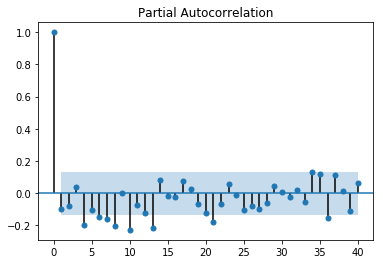

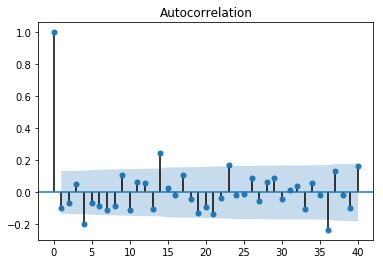

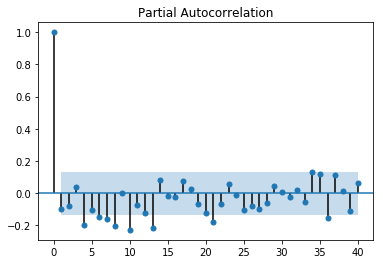

In [54]:
splt.plot_acf(decomp.resid[6:-6], lags = 40)
splt.plot_pacf(decomp.resid[6:-6], lags = 40)

## AR and MA

There are still some autocorrelation and partial autocorrelatoin values outside the shaded regions for more than the inital term.

So we have both Autoregressive and Moving Average behaviors



In [55]:
def model_ARIMA(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    print(model_fit.summary())
    return(model_fit)
ar2_model = model_ARIMA(Cottage_cheese, order = (3,0,0))


                              ARMA Model Results                              
Dep. Variable:      Cotagecheese.Prod   No. Observations:                  228
Model:                     ARMA(3, 0)   Log Likelihood                 239.246
Method:                           mle   S.D. of innovations              0.084
Date:                Thu, 14 Feb 2019   AIC                           -470.491
Time:                        17:03:58   BIC                           -456.774
Sample:                    01-31-1995   HQIC                          -464.957
                         - 12-31-2013                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ar.L1.Cotagecheese.Prod     0.3882      0.066      5.926      0.000       0.260       0.517
ar.L2.Cotagecheese.Prod     0.4306      0.066      6.502      0.000       0.301       0.560


In [56]:
ma1_model = model_ARIMA(Cottage_cheese, order = (0,0,1))


                              ARMA Model Results                              
Dep. Variable:      Cotagecheese.Prod   No. Observations:                  228
Model:                     ARMA(0, 1)   Log Likelihood                -194.167
Method:                           mle   S.D. of innovations              0.565
Date:                Thu, 14 Feb 2019   AIC                            392.333
Time:                        17:04:03   BIC                            399.192
Sample:                    01-31-1995   HQIC                           395.101
                         - 12-31-2013                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ma.L1.Cotagecheese.Prod     0.9216      0.017     54.712      0.000       0.889       0.955
                                    Roots                                    
              

## Find the best fit...

In [57]:
def model_ARIMA_2(ts, order):
    from statsmodels.tsa.arima_model import ARIMA
    from statsmodels.tsa.arima_model import ARIMAResults    
    model = ARIMA(ts, order = order)
    model_fit = model.fit(disp=0, method='mle', trend='nc')
    BIC = ARIMAResults.bic(model_fit)
    print('Testing model of order: ' + str(order) + ' with BIC = ' + str(BIC))
    return(BIC, order, model_fit)

def step_ARIMA(resid, p_max, d_max, q_max):
    from statsmodels.tsa.arima_model import ARIMAResults    
    from statsmodels.tsa.arima_model import ARIMA
    best_BIC = 9999999999999999.0
    for p in range(p_max + 1):
        for d in range(d_max + 1):
            for q in range(q_max + 1):
                if(p > 0 or q > 0):
                    try:
                        order = (p, d, q)
                        BIC, order, model = model_ARIMA_2(resid, order)
                        if(BIC < best_BIC):
                            best_model = model
                            best_BIC = BIC
                            best_order = order
                    except: 
                        pass        
    return(best_BIC, best_order, best_model) 

BIC, order, model = step_ARIMA(decomp.resid[6:-6], 3, 3, 3)    
print('***************************************')
print('Best model with BIC = ' + str(BIC) + ' and with order '+ str(order))

Testing model of order: (0, 0, 1) with BIC = -654.7721658214928
Testing model of order: (0, 0, 2) with BIC = -651.322801929216
Testing model of order: (0, 0, 3) with BIC = -653.3822435345176
Testing model of order: (0, 1, 1) with BIC = -642.755859437676
Testing model of order: (0, 2, 1) with BIC = -473.0127015326362
Testing model of order: (1, 0, 0) with BIC = -654.3956602617054
Testing model of order: (1, 0, 1) with BIC = -676.4596786585917
Testing model of order: (1, 1, 0) with BIC = -546.7206848851347
Testing model of order: (1, 1, 1) with BIC = -639.3921474153643
Testing model of order: (1, 2, 0) with BIC = -363.1924838980652
Testing model of order: (1, 2, 3) with BIC = -612.9558539181149
Testing model of order: (2, 0, 0) with BIC = -650.3952722114002
Testing model of order: (2, 0, 1) with BIC = -649.0168183630672


/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing model of order: (2, 0, 2) with BIC = -665.1238267687245
Testing model of order: (2, 1, 0) with BIC = -580.7270422235086
Testing model of order: (2, 1, 1) with BIC = -635.2393578238068
Testing model of order: (2, 2, 0) with BIC = -456.40710488244844
Testing model of order: (3, 0, 0) with BIC = -645.2898187632902
Testing model of order: (3, 0, 1) with BIC = -643.6900089877106
Testing model of order: (3, 0, 2) with BIC = -663.7516590978698
Testing model of order: (3, 1, 0) with BIC = -578.2445946024438
Testing model of order: (3, 1, 1) with BIC = -630.2146307457974
Testing model of order: (3, 2, 0) with BIC = -477.51956354722097
***************************************
Best model with BIC = -676.4596786585917 and with order (1, 0, 1)


## ARMA (p,q)

The best fit is ARMA(1,1)


## Now for the forecast

The basics - use the original data frame, add monthly dummy variables

In [59]:
## Create new features, the count of months from the start of the
## series and the square of the count of months.

Dairy.loc[:, 'Month_Cnt'] = [float(i + 1) for i in range(len(Dairy))]
Dairy.loc[:, 'Month_Cnt2'] = [x**2 for x in Dairy.Month_Cnt]

## Normalize the time features
from scipy.stats import zscore

Dairy.loc[:, ['Month_Cnt', 'Month_Cnt2']] = Dairy.loc[:, ['Month_Cnt', 'Month_Cnt2']].apply(zscore)
Dairy.loc[:,"log_cottage_cheese_prod"]= np.log(Dairy.loc[:,"Cotagecheese.Prod"])
## Create dummy variables for the months
years = int(len(Dairy)/12)
Dairy.loc[:, 'Month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] * years
dummies = pd.get_dummies(Dairy.loc[:, 'Month'])
Dairy[list(dummies.columns)] = dummies
## Print the head of the data frame to look at the dummy variables.
Dairy.head(12)

,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed,Month_Cnt,...,Jul,Jun,Mar,May,Nov,Oct,Sep,scores,resids,log_cottage_cheese_prod
1995-01-31,1995,Jan,4.370,51.595,2.112,0.9803,1,1,1,-1.724471,...,0,0,0,0,0,0,0,3.867369,-0.502631,1.474763
1995-02-28,1995,Feb,3.695,56.086,1.932,0.8924,2,4,8,-1.709277,...,0,0,0,0,0,0,0,3.664022,-0.030978,1.306981
1995-03-31,1995,Mar,4.538,68.453,2.162,0.8924,3,9,27,-1.694084,...,0,0,1,0,0,0,0,3.995342,-0.542658,1.512486
1995-04-30,1995,Apr,4.280,65.722,2.130,0.8967,4,16,64,-1.678890,...,0,0,0,0,0,0,0,3.823050,-0.456950,1.453953
1995-05-31,1995,May,4.470,73.730,2.227,0.8967,5,25,125,-1.663696,...,0,0,0,1,0,0,0,3.921536,-0.548464,1.497388
1995-06-30,1995,Jun,4.238,77.994,2.124,0.9160,6,36,216,-1.648503,...,0,1,0,0,0,0,0,3.963189,-0.274811,1.444091
1995-07-31,1995,Jul,4.377,81.475,2.184,0.9160,7,49,343,-1.633309,...,1,0,0,0,0,0,0,3.971397,-0.405603,1.476364
1995-08-31,1995,Aug,4.368,74.981,2.152,0.8934,8,64,512,-1.618116,...,0,0,0,0,0,0,0,4.024828,-0.343172,1.474305
1995-09-30,1995,Sep,3.917,61.530,2.062,0.8934,9,81,729,-1.602922,...,0,0,0,0,0,0,1,3.793537,-0.123463,1.365326
1995-10-31,1995,Oct,4.078,60.022,2.121,0.9434,10,100,1000,-1.587729,...,0,0,0,0,0,1,0,3.838800,-0.239200,1.405607


In [60]:
import sklearn.linear_model as lm
X = Dairy.loc[:'2012-12-31', ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
Y = Dairy.loc[:'2012-12-31', 'log_cottage_cheese_prod'].as_matrix()
lm_mod = lm.LinearRegression(fit_intercept = False)
mod_fit = lm_mod.fit(X, Y)

## and the predictions and the residual
Dairy.loc[:'2012-12-31', 'scores'] = mod_fit.predict(X)
Dairy.loc[:'2012-12-31', 'resids'] = Dairy.loc[:'2012-12-31', 'scores'] - Dairy.loc[:'2012-12-31', 'log_cottage_cheese_prod']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


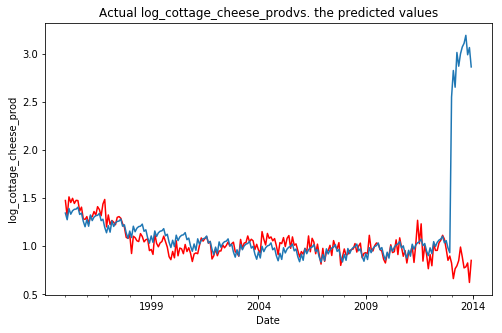

In [61]:
def plot_mod_fit(df, col):
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(8, 5)) # set plot area
    ax = fig.gca() # define axis  
    df.loc[:, col].plot(color = 'r', ax = ax)
    df.loc[:, 'scores'].plot(ax = ax) 
    ax.set_title('Actual ' + col + 'vs. the predicted values') # Give the plot a main title
    ax.set_xlabel('Date') # Set text for the x axis
    ax.set_ylabel(col)# Set text for y axis
plot_mod_fit(Dairy, 'log_cottage_cheese_prod')  

## Take a look at the residuals..


In [62]:
def RMSE(ts, score):
    from math import sqrt
    return sqrt(np.std(ts - score))

## Make the forecast for the next year
X = Dairy.loc['2012-12-31':, ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
RMSE(Dairy.loc['2012-12-31':, 'log_cottage_cheese_prod'].as_matrix(), mod_fit.predict(X))

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


0.314940362949572

## Looking at the residuals...

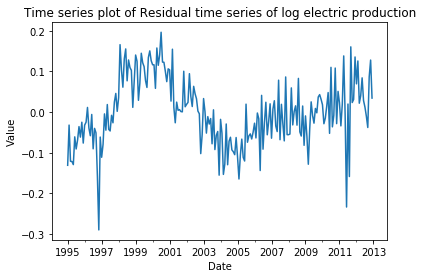

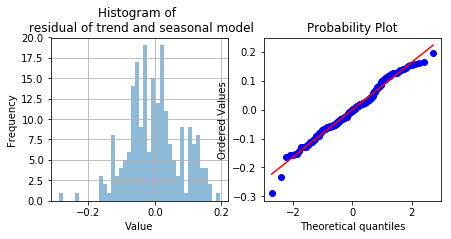

In [63]:
def plot_ts(ts, lab = ''):
    ts.plot()
    plt.title('Time series plot of ' + lab)
    plt.ylabel('Value')
    plt.xlabel('Date')
    
plot_ts(Dairy.loc[:'2012-12-31', 'resids'],'Residual time series of log electric production')
dist_ts(Dairy.loc[:'2012-12-31', 'resids'], '\n residual of trend and seasonal model')

## Something resembling periodic behavior for the residuals

Let's see if they are stationary

In [64]:
DF_Test(Dairy.loc[:'2012-12-31', 'resids'])

D-F statistic = -2.550487250112843
p-value = 0.10366830510603742
number of lags used = 4
Critical value at 5% confidence = -2.8753374677799957
Critical value at 10% confidence = -2.574124089081557


## Not  Stationary!

We cannot reject the null hypothesis (the time series is not stationary) at the 95% confidence level for the log of the cottage cheese production.

Now, we will compute an ARIMA model for the residual using the `step_ARIMA` function we used earlier. We will train this model, without the last 12 months of data, which we will use to evaluate the model. Execute the code in the cell below to search for the best ARIMA mode order.



In [65]:
BIC, order, model_fit = step_ARIMA(Dairy.loc[:'2012-12-31', 'resids'], 4, 3, 4)    
print('Best order = ' + str(order) + ' best BIC = ' + str(BIC))

Testing model of order: (0, 0, 1) with BIC = -505.22665758615153
Testing model of order: (0, 0, 2) with BIC = -519.3189591772277
Testing model of order: (0, 0, 3) with BIC = -544.6964856421262
Testing model of order: (0, 0, 4) with BIC = -545.449802312615
Testing model of order: (0, 1, 1) with BIC = -593.6349453016473
Testing model of order: (0, 2, 1) with BIC = -473.84951194715387
Testing model of order: (1, 0, 0) with BIC = -538.3655162385494
Testing model of order: (1, 0, 1) with BIC = -593.6701107584549
Testing model of order: (1, 0, 2) with BIC = -592.1730941610888
Testing model of order: (1, 0, 3) with BIC = -587.65032785012
Testing model of order: (1, 1, 0) with BIC = -551.0422357388809
Testing model of order: (1, 1, 1) with BIC = -590.7678989730817
Testing model of order: (1, 1, 2) with BIC = -584.978983564989
Testing model of order: (1, 1, 3) with BIC = -585.930891320131
Testing model of order: (1, 1, 4) with BIC = -581.9370363983327
Testing model of order: (1, 2, 0) with BIC 

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing model of order: (2, 2, 4) with BIC = -575.025230168265
Testing model of order: (3, 0, 0) with BIC = -592.6311380618661
Testing model of order: (3, 0, 1) with BIC = -589.5996736028994
Testing model of order: (3, 0, 2) with BIC = -588.0164906166028
Testing model of order: (3, 0, 3) with BIC = -582.6583239852387
Testing model of order: (3, 0, 4) with BIC = -577.2860028296388
Testing model of order: (3, 1, 0) with BIC = -584.1253838488299
Testing model of order: (3, 1, 1) with BIC = -585.0699587852564
Testing model of order: (3, 1, 2) with BIC = -581.7444853368078
Testing model of order: (3, 1, 3) with BIC = -576.8169018111173
Testing model of order: (3, 1, 4) with BIC = -571.7217444762505
Testing model of order: (3, 2, 0) with BIC = -482.57688769147126
Testing model of order: (3, 2, 1) with BIC = -568.0812376298173
Testing model of order: (3, 2, 2) with BIC = -561.587241445385
Testing model of order: (3, 2, 4) with BIC = -561.5039299094029
Testing model of order: (4, 0, 0) with BI

/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Testing model of order: (4, 2, 3) with BIC = -561.0937689610256
Testing model of order: (4, 2, 4) with BIC = -557.3626580862535
Best order = (1, 0, 1) best BIC = -593.6701107584549


/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [66]:
start_index = len(Dairy.loc[:'2012-12-31', 'resids'])
end_index = start_index + 12
model_prediction = model_fit.predict(start=start_index, end=end_index)

## Make the forecast for the next year
X = Dairy.loc['2012-12-31':, ['Month_Cnt', 'Month_Cnt2', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].as_matrix()
## and the predictions for the forecast
Dairy.loc['2012-12-31':, 'scores'] =  mod_fit.predict(X) - model_prediction
model_prediction

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


2013-01-31    0.045269
2013-02-28    0.043891
2013-03-31    0.042555
2013-04-30    0.041259
2013-05-31    0.040003
2013-06-30    0.038786
2013-07-31    0.037605
2013-08-31    0.036460
2013-09-30    0.035350
2013-10-31    0.034274
2013-11-30    0.033231
2013-12-31    0.032219
2014-01-31    0.031239
Freq: M, dtype: float64

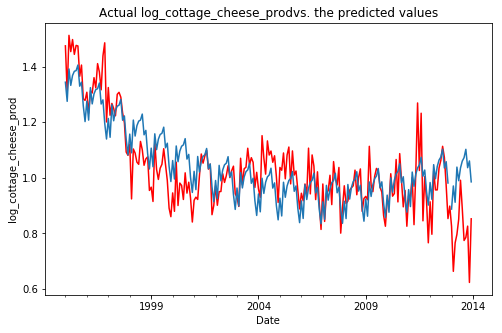

In [67]:
plot_mod_fit(Dairy, 'log_cottage_cheese_prod') 

In [68]:
RMSE(Dairy.loc['2012-12-31':, 'Cotagecheese.Prod'].as_matrix(), Dairy.loc['2012-12-31':, 'scores'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


0.46305787555295325